In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from astropy.io import fits
from scipy import ndimage

## Loading In Moment 0 Maps

In [3]:
#Calling FITS file for co_25_74

location = "/Users/RuheeJanmohamed/Desktop/Data/co_25_74_M0.fits"

hdul = fits.open(location)

hdu_25_74 = hdul[0]

co_25_74 = hdu_25_74.data

#Calling FITS file for co_75_124

location = "/Users/RuheeJanmohamed/Desktop/Data/co_75_124_M0.fits"

hdul = fits.open(location)

hdu_75_124 = hdul[0]

co_75_124 = hdu_75_124.data

#Calling FITS file for co_125_174

location = "/Users/RuheeJanmohamed/Desktop/Data/co_125_174_M0.fits"

hdul = fits.open(location)

hdu_125_174 = hdul[0]

co_125_174 = hdu_125_174.data

#Calling FITS file for co_175_224

location = "/Users/RuheeJanmohamed/Desktop/Data/co_175_224_M0.fits"

hdul = fits.open(location)

hdu_175_224 = hdul[0]

co_175_224 = hdu_175_224.data

#Calling FITS file for co_225_274

location = "/Users/RuheeJanmohamed/Desktop/Data/co_225_274_M0.fits"

hdul = fits.open(location)

hdu_225_274 = hdul[0]

co_225_274 = hdu_225_274.data

#Calling FITS file for co_275_299

location = "/Users/RuheeJanmohamed/Desktop/Data/co_275_299_M0.fits"

hdul = fits.open(location)

hdu_275_299 = hdul[0]

co_275_299 = hdu_275_299.data

#Calling FITS file for co_300_224

location = "/Users/RuheeJanmohamed/Desktop/Data/co_300_324_M0.fits"

hdul = fits.open(location)

hdu_300_324 = hdul[0]

co_300_324 = hdu_300_324.data


#Calling FITS file for co_325_374

location = "/Users/RuheeJanmohamed/Desktop/Data/co_325_374_M0.fits"

hdul = fits.open(location)

hdu_325_374 = hdul[0]

co_325_374 = hdu_325_374.data

#Calling FITS file for co_375_424

location = "/Users/RuheeJanmohamed/Desktop/Data/co_375_424_M0.fits"

hdul = fits.open(location)

hdu_375_424 = hdul[0]

co_375_424 = hdu_375_424.data

#Calling FITS file for co_425_474

location = "/Users/RuheeJanmohamed/Desktop/Data/co_425_474_M0.fits"

hdul = fits.open(location)

hdu_425_474 = hdul[0]

co_425_474 = hdu_425_474.data

#Calling FITS file for co_475_524

location = "/Users/RuheeJanmohamed/Desktop/Data/co_475_524_M0.fits"

hdul = fits.open(location)

hdu_475_524 = hdul[0]

co_475_524 = hdu_475_524.data

#Calling FITS file for co_525_574

location = "/Users/RuheeJanmohamed/Desktop/Data/co_525_574_M0.fits"

hdul = fits.open(location)

hdu_525_574 = hdul[0]

co_525_574 = hdu_525_574.data

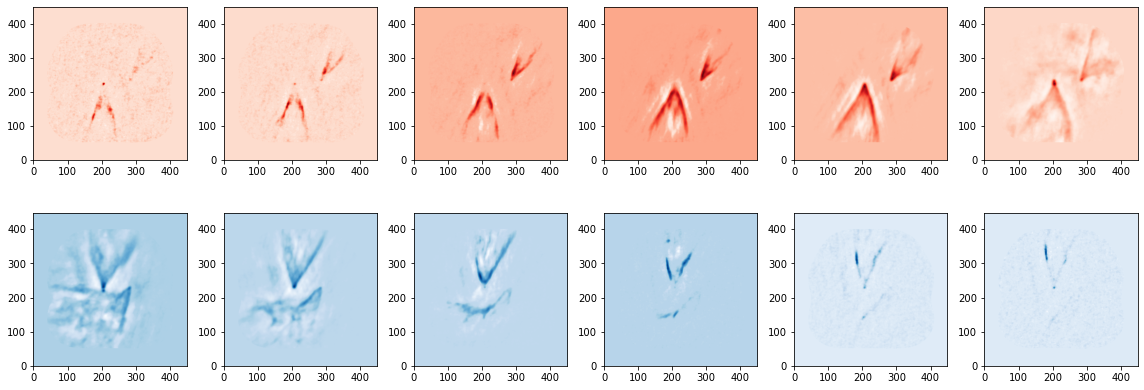

In [4]:
fig, axis = plt.subplots(2,6, figsize=(16,6))

co_maps = [
    co_25_74,co_75_124,co_125_174,co_175_224,co_225_274,co_275_299,
    co_300_324,co_325_374,co_375_424,co_425_474,co_475_524,co_525_574
]



for ax,co_map in zip(axis.flat[0:6],co_maps[0:6]):
    ax.imshow(co_map,cmap='Reds',origin='lower')

    
for ax,co_map in zip(axis.flat[6:12],co_maps[6:12]):
    ax.imshow(co_map,cmap='Blues',origin='lower')  
    
plt.tight_layout()

### Defining Angle,Gaussian and Linear Fit

In [5]:
def Line_Base(x,m):
    
    f = (x)*m
    return f

def Line_angle(a,b):
    theta1 = np.arctan(a)
    theta2 = np.arctan(b)

    combined_theta = [theta1,theta2]

    theta_list = []

    for theta in combined_theta:
        if np.sign(theta) == -1:
            new_theta = np.pi-abs(theta)
            theta_list.append(np.rad2deg(new_theta))
        else:
            theta_list.append(np.rad2deg(theta))
            
    f = np.abs(theta_list[0]-theta_list[1]) #difference in angle from the horizontal
            
    return f


def Double_Gauss(x,amp_1,mean_1,sigma_1,amp_2,mean_2,sigma_2):
    f = (amp_1 * np.exp(-(x - mean_1)**2/(2*sigma_1**2))+ (amp_2 * np.exp(-(x-mean_2)**2/(2*sigma_2**2))))
    return f


In [6]:
#Gaussian function

def Gaussian_func(filename,offset_1,offset_2,channel,a,b,width):
    Model_Values = open(filename, "w")

    Model_Values.write("y_cut\tfit_pk_1\tfit_x_1\tfit_s_1\tfit_pk_2\tfit_x_2\tfit_s_2\tfit_pk_e\tfit_x_e\tfit_s_e\tx_c1\tx_c2\tpk_c1\tpk_c2\n")

    offset_x1 = offset_1 
    offset_x2 = offset_2

    first = 0

    for ycut in ycut_list:
        cut = channel[ycut[0]:ycut[1],offset_x1:offset_x2]
        avg_cut = np.mean(cut,axis=0)
        avg_cut[avg_cut<0]=0 #doesn't change original image
        xdata=np.arange(a,b)
        idata=avg_cut[a:b] 

        if (first < 1): #giving it intial first guess
            p0 = (np.max(idata),xdata[np.argmax(idata)],5,np.max(idata),xdata[np.argmax(idata)]-width,5)
            first =1
        else:
            p0 = p_opt #telling it to look where it was before

        p_opt,p_cov = curve_fit(Double_Gauss,xdata,idata,p0,maxfev=900000)



        plt.plot(range(offset_2-offset_1),avg_cut,c='k')
        plt.plot(xdata,Double_Gauss(xdata,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4],p_opt[5]))

        Err =np.sqrt(np.diag(p_cov))
        Model_Values.write("%f\t" % np.mean(ycut)) #,0.
        Model_Values.write("%f\t%f\t%f\t\t%f\t\t%f\t\t%f\t\t" % (p_opt[0],p_opt[1]+offset_x1,p_opt[2],p_opt[3],p_opt[4]+offset_x1,p_opt[5]))
        Model_Values.write("%f\t%f\t%f\t%f\t%f\t%f\t" % (Err[0],Err[1],Err[2],Err[3],Err[4],Err[5]))
        Model_Values.write("%f\t%f\t" % (xdata[idata==np.max(idata)]+offset_x1,xdata[np.argmax(idata)]+offset_x1))
        Model_Values.write("%f\t%f\t" % (np.max(idata),np.max(idata)))
        Model_Values.write("\n")


    plt.xlabel("Position")
    plt.ylabel("Intensity")
    Model_Values.close()

In [7]:
#Splicing Function

def splice_func(param1,param2,param3,param4,start_ind,end_ind):
    
    if start_ind == 'lol' and end_ind == 'lol':
        return (param1[:],param2[:],param3[:],param4[:])
        
    elif start_ind == 'lol':
        return (param1[:end_ind],param2[:end_ind],param3[:end_ind],param4[:end_ind])
        
    elif end_ind == 'lol':
        return (param1[start_ind:],param2[start_ind:],param3[start_ind:],param4[start_ind:])
        
    else:
        return (param1[start_ind:end_ind],param2[start_ind:end_ind],param3[start_ind:end_ind],param4[start_ind:end_ind])
        

In [14]:
#Plotting Gaussian

def Gaussian_plot(filename,star_x,star_y,text_x,text_y,figure_name,outflow_type,start_ind='lol',end_ind='lol'):
    
    ycut_right,xfit_right = np.genfromtxt(filename, skip_header = 2, unpack=True, usecols=[0,2])
    ycut_left,xfit_left = np.genfromtxt(filename, skip_header = 2, unpack=True, usecols=[0,5])
    
    ycut_right,xfit_right,ycut_left,xfit_left = splice_func(ycut_right,xfit_right,ycut_left,xfit_left,start_ind,end_ind)
    
    l_opt,l_cov = curve_fit(Line_Base,xfit_right-star_x,ycut_right-star_y)  
    p_opt,p_cov = curve_fit(Line_Base,xfit_left-star_x,ycut_left-star_y)
    
    angle = Line_angle(p_opt[0],l_opt[0])
    
    fig = plt.figure(figsize=[8,8])
    ax = fig.subplots()
    ax.set_aspect('equal')
    
    if outflow_type == "main":
        x_plt_right = np.array([0,max(xfit_right)-star_x])
        x_plt_left = np.array([0,min(xfit_left)-star_x])
        
    elif outflow_type == "secondary": 
        x_plt_right = np.array([0,min(xfit_right)-star_x])
        x_plt_left = np.array([0,max(xfit_left)-star_x])


    ax.plot(x_plt_right+star_x,Line_Base(x_plt_right,l_opt[0])+star_y) #200,230
    ax.scatter(xfit_right,ycut_right,s = 5, color = 'b', label = 'Right Side') #Original data points

    ax.plot(star_x,star_y,'ro') #Protostar
    ax.text(text_x,text_y, (r'Angle: {:.3f}'.format(angle)+" degrees"),weight='bold')

    ax.plot(x_plt_left+star_x,Line_Base(x_plt_left,p_opt[0])+star_y) #205,215
    ax.scatter(xfit_left,ycut_left,s = 5, color = 'r', label = 'Left Side') #Original data points

    fig.savefig(figure_name)

In [106]:
def Gaussian_subplot(filename,star_x,star_y,text_x,text_y,figure_name,outflow_type,i,j,start_ind='lol',end_ind='lol'):
    
    ycut_right,xfit_right = np.genfromtxt(filename, skip_header = 2, unpack=True, usecols=[0,2])
    ycut_left,xfit_left = np.genfromtxt(filename, skip_header = 2, unpack=True, usecols=[0,5])
    
    ycut_right,xfit_right,ycut_left,xfit_left = splice_func(ycut_right,xfit_right,ycut_left,xfit_left,start_ind,end_ind)
    
    l_opt,l_cov = curve_fit(Line_Base,xfit_right-star_x,ycut_right-star_y)  
    p_opt,p_cov = curve_fit(Line_Base,xfit_left-star_x,ycut_left-star_y)
    
    angle = Line_angle(p_opt[0],l_opt[0])
    
    ax[i,j].set_aspect('equal')
    
    if outflow_type == "main":
        x_plt_right = np.array([0,max(xfit_right)-star_x])
        x_plt_left = np.array([0,min(xfit_left)-star_x])
        
    elif outflow_type == "secondary": 
        x_plt_right = np.array([0,min(xfit_right)-star_x])
        x_plt_left = np.array([0,max(xfit_left)-star_x])

    
    ax[i,j].plot(x_plt_right+star_x,Line_Base(x_plt_right,l_opt[0])+star_y,c='b') #200,230
    ax[i,j].scatter(xfit_right,ycut_right,s = 5, color = 'b', label = 'Right Side') #Original data points

    ax[i,j].plot(star_x,star_y,'ro') #Protostar
    ax[i,j].text(text_x,text_y, (r'Angle: {:.3f}'.format(angle)+" $^{o}$"),weight='bold')

    ax[i,j].plot(x_plt_left+star_x,Line_Base(x_plt_left,p_opt[0])+star_y,c='r') #205,215
    ax[i,j].scatter(xfit_left,ycut_left,s = 5, color = 'r', label = 'Left Side') #Original data points

    fig.savefig(figure_name)
    
    

## Fitting Redshifted Outflows

In [8]:
ycut_list = [(70+((i)*5),70+((i+1)*5)) for i in range(30)]

print(ycut_list)

[(70, 75), (75, 80), (80, 85), (85, 90), (90, 95), (95, 100), (100, 105), (105, 110), (110, 115), (115, 120), (120, 125), (125, 130), (130, 135), (135, 140), (140, 145), (145, 150), (150, 155), (155, 160), (160, 165), (165, 170), (170, 175), (175, 180), (180, 185), (185, 190), (190, 195), (195, 200), (200, 205), (205, 210), (210, 215), (215, 220)]


## Main Outflows - South

### Co_25_74

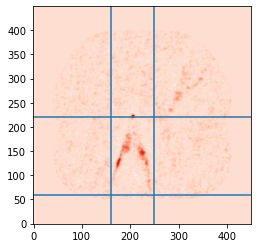

In [9]:
plt.imshow(co_25_74,cmap='Reds',origin='lower')
plt.axvline(160)
plt.axvline(250)
plt.axhline(60)
plt.axhline(220)

/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-

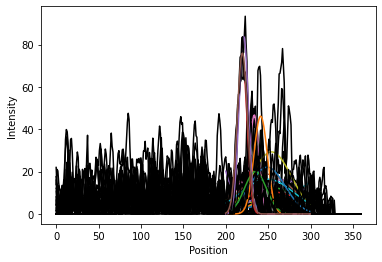

In [96]:
Gaussian_func("VelocityMaps_co_25_74_South.txt",80,440,co_25_74,200,300,80)

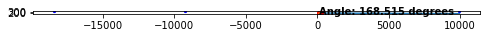

In [97]:
Gaussian_plot('VelocityMaps_co_25_74_South.txt',204,220,160,80,"VelocityMap_Co_25_74_Red.png","main")



<ipython-input-7-7c1a316caa8f>:30: RuntimeWarning: invalid value encountered in sqrt
  Err =np.sqrt(np.diag(p_cov))
<ipython-input-7-7c1a316caa8f>:30: RuntimeWarning: invalid value encountered in sqrt
  Err =np.sqrt(np.diag(p_cov))
<ipython-input-7-7c1a316caa8f>:30: RuntimeWarning: invalid value encountered in sqrt
  Err =np.sqrt(np.diag(p_cov))
<ipython-input-7-7c1a316caa8f>:30: RuntimeWarning: invalid value encountered in sqrt
  Err =np.sqrt(np.diag(p_cov))


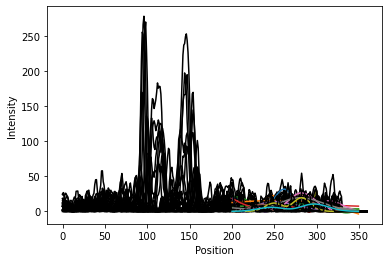

In [7]:
Model_Values = open("VelocityMaps_co_25_74_South.txt", "w")

Model_Values.write("y_cut\tfit_pk_1\tfit_x_1\tfit_s_1\tfit_pk_2\tfit_x_2\tfit_s_2\tfit_pk_e\tfit_x_e\tfit_s_e\tx_c1\tx_c2\tpk_c1\tpk_c2\n")

offset_x1 = 80 
offset_x2 = 440

first = 0

for ycut in ycut_list:
    cut = co_25_74[ycut[0]:ycut[1],offset_x1:offset_x2]
    avg_cut = np.mean(cut,axis=0)
    avg_cut[avg_cut<0]=0 #doesn't change original image
    xdata=np.arange(200,350)
    idata=avg_cut[200:350] 
    
    if (first < 1): #giving it intial first guess
        p0 = (np.max(idata),xdata[np.argmax(idata)],5,np.max(idata),xdata[np.argmax(idata)]-100,5)
        first =1
    else:
        p0 = p_opt #telling it to look where it was before
        
    p_opt,p_cov = curve_fit(Double_Gauss,xdata,idata,p0,maxfev=900000)
    
       
    
    plt.plot(range(360),avg_cut,c='k')
    plt.plot(xdata,Double_Gauss(xdata,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4],p_opt[5]))
    
    Err =np.sqrt(np.diag(p_cov))
    Model_Values.write("%f\t" % np.mean(ycut)) #,0.
    Model_Values.write("%f\t%f\t%f\t\t%f\t\t%f\t\t%f\t\t" % (p_opt[0],p_opt[1]+offset_x1,p_opt[2],p_opt[3],p_opt[4]+offset_x1,p_opt[5]))
    Model_Values.write("%f\t%f\t%f\t%f\t%f\t%f\t" % (Err[0],Err[1],Err[2],Err[3],Err[4],Err[5]))
    Model_Values.write("%f\t%f\t" % (xdata[idata==np.max(idata)]+offset_x1,xdata[np.argmax(idata)]+offset_x1))
    Model_Values.write("%f\t%f\t" % (np.max(idata),np.max(idata)))
    Model_Values.write("\n")
  
    
plt.xlabel("Position")
plt.ylabel("Intensity")
Model_Values.close()




In [8]:
ycut_right_Main_25_74,xfit_right_Main_25_74 = np.genfromtxt("VelocityMaps_co_25_74_South.txt", skip_header = 2, unpack=True, usecols=[0,2])
ycut_left_Main_25_74,xfit_left_Main_25_74 = np.genfromtxt("VelocityMaps_co_25_74_South.txt", skip_header = 2, unpack=True, usecols=[0,5])

print(xfit_right_Main_25_74)
print(xfit_left_Main_25_74)

[366.622283 365.233943 370.729463 374.269399 376.282369 375.897837
 377.795166 378.809661 366.880269 369.176691 365.75181  335.84911
 280.58226  319.167833 329.05477  368.176596 350.787449 360.344337
 369.453443 355.75641  494.327351 416.128586 279.510154 150.327398
 339.095393 341.952651 324.038178 346.693459 353.212506]
[   327.592891    332.613625    348.724334    335.418302    262.460102
    312.41442  -14715.829375 -17425.169565 -11506.459126  -7274.269611
  -5524.876169  -3909.118918  -3562.064397    324.389675    315.209788
    368.184727    350.770181    356.381436    355.238246    355.690715
    491.197656   3523.638286    278.955217     80.003799    339.103976
    341.965968    324.053829    346.702072    353.216596]


In [9]:
l_opt,l_cov = curve_fit(Line_Base,xfit_right_Main_25_74-204,ycut_right_Main_25_74-220)  
p_opt,p_cov = curve_fit(Line_Base,xfit_left_Main_25_74-204,ycut_left_Main_25_74-220)

In [10]:
co25_74_angle_South = Line_angle(p_opt[0],l_opt[0]) #only need the slope

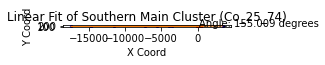

In [11]:
fig = plt.figure(figsize=[3,6])
ax = fig.subplots()
ax.set_aspect('equal')

ax.set_title("Linear Fit of Southern Main Cluster (Co_25_74)")
ax.set_ylabel("Y Coord")
ax.set_xlabel("X Coord") #Def need to change this

ax.plot(xfit_right_Main_25_74,Line_Base(xfit_right_Main_25_74-204,l_opt[0])+220) #200,230
ax.scatter(xfit_right_Main_25_74,ycut_right_Main_25_74,s = 5, color = 'r', label = 'Right Side') #Original data points

ax.plot(204,220,'ro') #Protostar
ax.text(160,80, (r'Angle: {:.3f}'.format(co25_74_angle_South)+" degrees"))

ax.plot(xfit_left_Main_25_74,Line_Base(xfit_left_Main_25_74-204,p_opt[0])+220) #205,215
ax.scatter(xfit_left_Main_25_74,ycut_left_Main_25_74,s = 5, color = 'b', label = 'Left Side') #Original data points

fig.savefig("co25_74_angle_South.png")




### Co_75_124

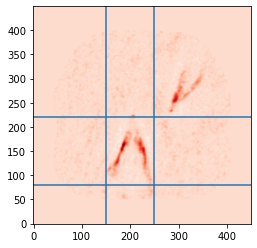

In [11]:
plt.imshow(co_75_124,cmap='Reds',origin='lower')
plt.axvline(150)
plt.axvline(250)
plt.axhline(80)
plt.axhline(220)

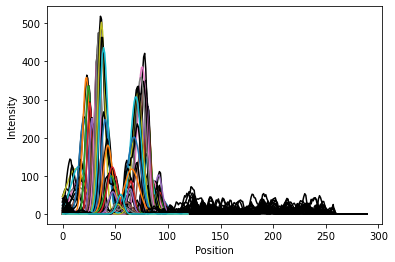

In [12]:
Gaussian_func('VelocityMaps_co_75_124_South.txt',150,440,co_75_124,0,120,100)

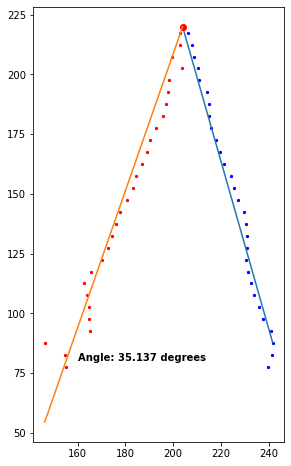

In [15]:
Gaussian_plot('VelocityMaps_co_75_124_South.txt',204,220,160,80,"VelocityMap_Co_75_124_Red.png","main")



### Co_125_174

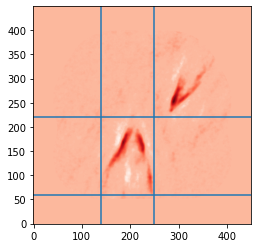

In [16]:
plt.imshow(co_125_174,cmap='Reds',origin='lower')
plt.axvline(140)
plt.axvline(250)
plt.axhline(60)
plt.axhline(220)

<ipython-input-6-30cdcafd1ea7>:33: RuntimeWarning: invalid value encountered in sqrt
  Err =np.sqrt(np.diag(p_cov))
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


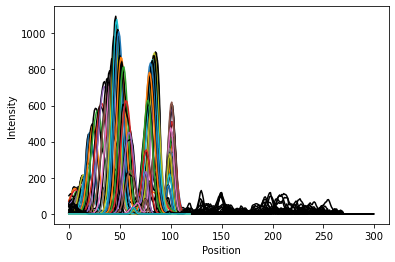

In [17]:
Gaussian_func('VelocityMaps_co_125_174_South.txt',140,440,co_125_174,0,120,100)

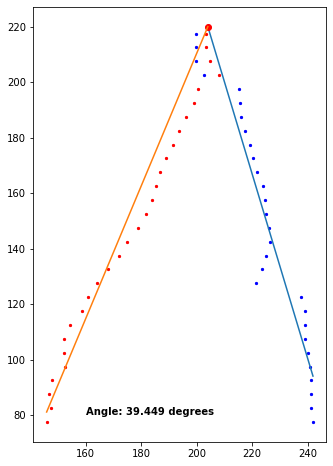

In [18]:
Gaussian_plot("VelocityMaps_co_125_174_South.txt",204,220,160,80,"VelocityMap_Co_125_174_Red.png","main")

### Co_175_224

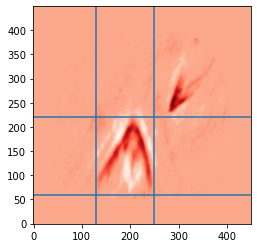

In [19]:
plt.imshow(co_175_224,cmap='Reds',origin='lower')
plt.axvline(130)
plt.axvline(250)
plt.axhline(60)
plt.axhline(220)

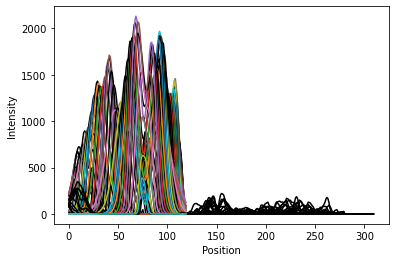

In [20]:
Gaussian_func('VelocityMaps_co_175_224_South.txt',130,440,co_175_224,0,120,100)

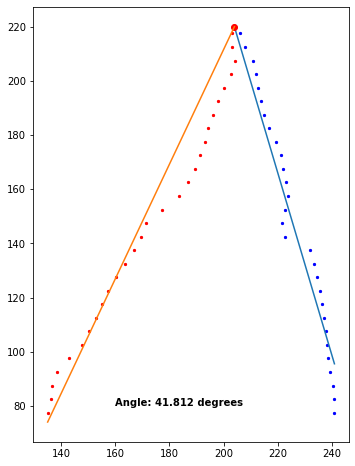

In [21]:
Gaussian_plot("VelocityMaps_co_175_224_South.txt",204,220,160,80,"VelocityMap_Co_175_224_Red.png","main")

### Co_225_274

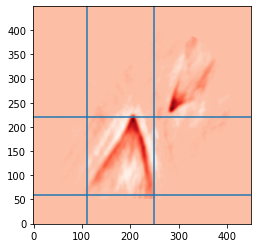

In [22]:
plt.imshow(co_225_274,cmap='Reds',origin='lower')
plt.axvline(110)
plt.axvline(250)
plt.axhline(60)
plt.axhline(220)

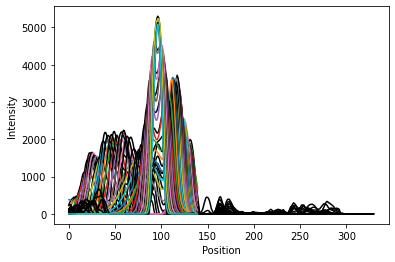

In [24]:
Gaussian_func('VelocityMaps_co_225_274_South.txt',110,440,co_225_274,0,140,100)

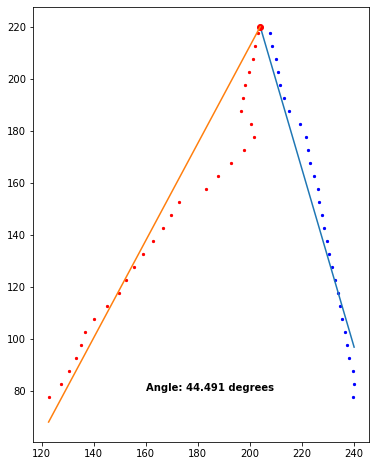

In [25]:
Gaussian_plot("VelocityMaps_co_225_274_South.txt",204,220,160,80,"VelocityMap_Co_225_274_Red.png","main")

### Co_275_299

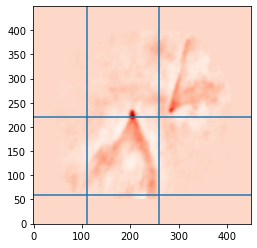

In [26]:
plt.imshow(co_275_299,cmap='Reds',origin='lower')
plt.axvline(110)
plt.axvline(260)
plt.axhline(60)
plt.axhline(220)

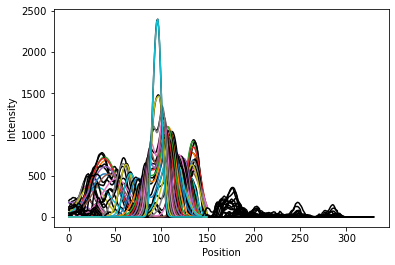

In [27]:
Gaussian_func('VelocityMaps_co_275_299_South.txt',110,440,co_275_299,0,150,100)

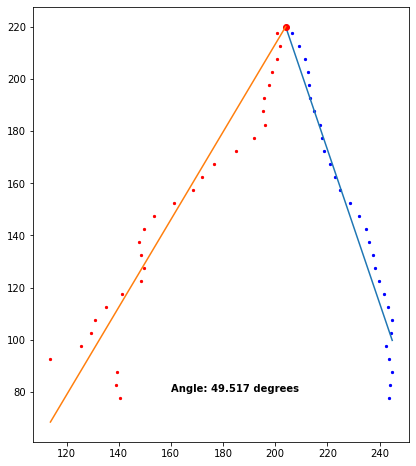

In [28]:
Gaussian_plot("VelocityMaps_co_275_299_South.txt",204,220,160,80,"VelocityMap_Co_275_299_Red.png","main")

## Secondary Outflows - South

In [29]:
ycut_list = [(390-((i+1)*5),390-(i*5)) for i in range(26)]
print(ycut_list)

[(385, 390), (380, 385), (375, 380), (370, 375), (365, 370), (360, 365), (355, 360), (350, 355), (345, 350), (340, 345), (335, 340), (330, 335), (325, 330), (320, 325), (315, 320), (310, 315), (305, 310), (300, 305), (295, 300), (290, 295), (285, 290), (280, 285), (275, 280), (270, 275), (265, 270), (260, 265)]


### Co_25_74

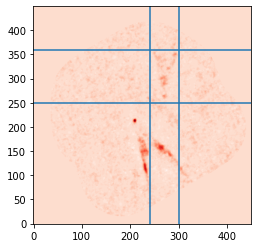

In [30]:
co_25_74_rot = ndimage.rotate(co_25_74, angle=-30,reshape=False)

plt.imshow(co_25_74_rot,cmap='Reds',origin='lower')
plt.axvline(240)
plt.axvline(300)
plt.axhline(360)
plt.axhline(250)

<ipython-input-6-30cdcafd1ea7>:33: RuntimeWarning: invalid value encountered in sqrt
  Err =np.sqrt(np.diag(p_cov))
<ipython-input-6-30cdcafd1ea7>:33: RuntimeWarning: invalid value encountered in sqrt
  Err =np.sqrt(np.diag(p_cov))


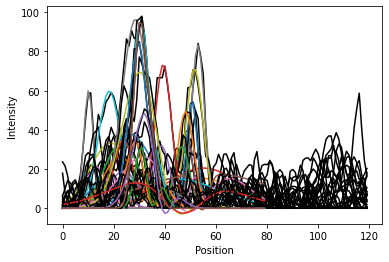

In [31]:
Gaussian_func('VelocityMaps_co_25_74_SecondarySouth.txt',240,360,co_25_74_rot,0,80,-32)

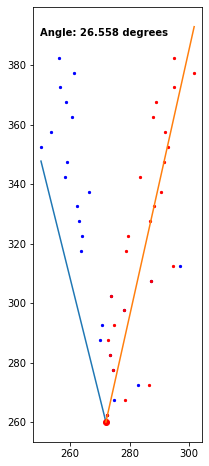

In [37]:
Gaussian_plot("VelocityMaps_co_25_74_SecondarySouth.txt",272,260,250,390,"VelocityMap_Co_25_74_SecRed.png","secondary")

### Co_75_124

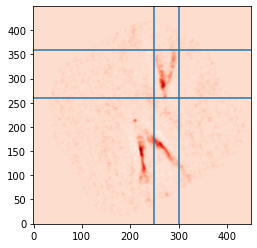

In [38]:
co_75_124_rot = ndimage.rotate(co_75_124, angle=-30,reshape=False)

plt.imshow(co_75_124_rot,cmap='Reds',origin='lower')
plt.axvline(250)
plt.axvline(300)
plt.axhline(360)
plt.axhline(260)

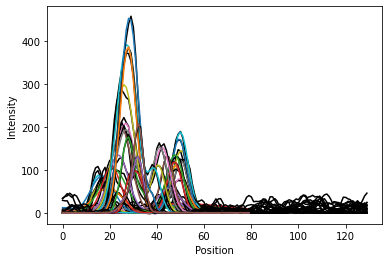

In [39]:
Gaussian_func('VelocityMaps_co_75_124_SecondarySouth.txt',240,370,co_75_124_rot,0,80,-50)

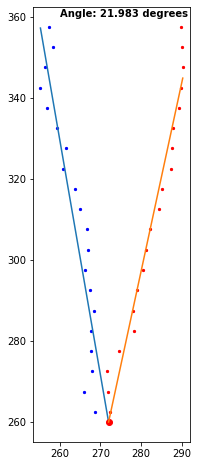

In [45]:
Gaussian_plot("VelocityMaps_co_75_124_SecondarySouth.txt",272,260,260,360,"VelocityMap_Co_75_124_SecRed.png","secondary",start_ind = 5, end_ind=26)

### Co_125_174

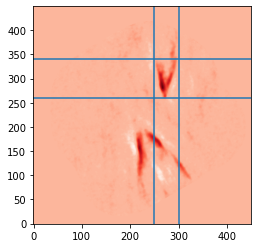

In [43]:
co_125_174_rot = ndimage.rotate(co_125_174, angle=-30,reshape=False)

plt.imshow(co_125_174_rot,cmap='Reds',origin='lower')
plt.axvline(250)
plt.axvline(300)

plt.axhline(260)
plt.axhline(340)

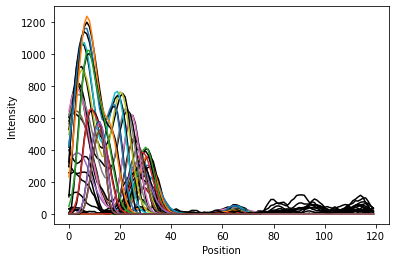

In [44]:
Gaussian_func('VelocityMaps_co_125_174_SecondarySouth.txt',260,380,co_125_174_rot,0,120,-51)

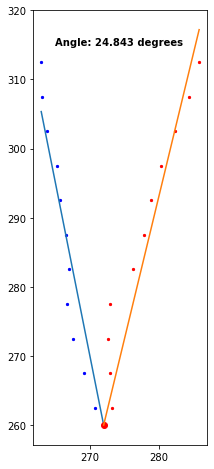

In [49]:
Gaussian_plot("VelocityMaps_co_125_174_SecondarySouth.txt",272,260,265,315,"VelocityMap_Co_125_174_SecRed.png","secondary",start_ind = 14, end_ind=26)

### Co_175_224

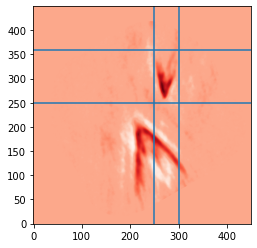

In [51]:
co_175_224_rot = ndimage.rotate(co_175_224, angle=-30,reshape=False)

plt.imshow(co_175_224_rot,cmap='Reds',origin='lower')
plt.axvline(250)
plt.axvline(300)
plt.axhline(360)
plt.axhline(250)

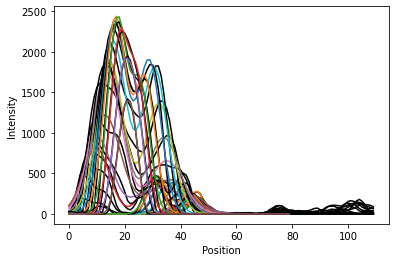

In [52]:
Gaussian_func('VelocityMaps_co_175_224_SecondarySouth.txt',250,360,co_175_224_rot,0,80,-50)

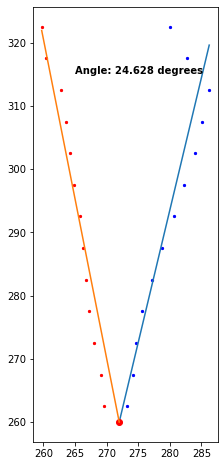

In [54]:
Gaussian_plot("VelocityMaps_co_175_224_SecondarySouth.txt",272,260,265,315,"VelocityMap_Co_175_224_SecRed.png","main",start_ind = 12, end_ind=28)

### Co_225_274

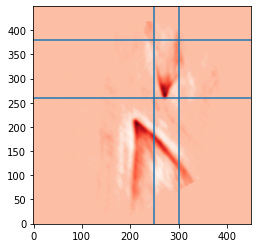

In [55]:
co_225_274_rot = ndimage.rotate(co_225_274, angle=-30,reshape=False)

plt.imshow(co_225_274_rot,cmap='Reds',origin='lower')
plt.axvline(250)
plt.axvline(300)
plt.axhline(380)
plt.axhline(260)

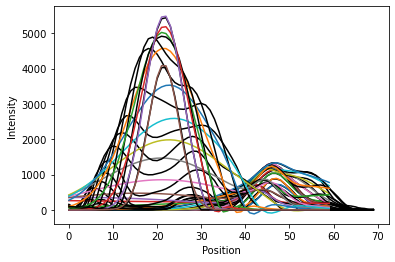

In [56]:
Gaussian_func('VelocityMaps_co_225_274_SecondarySouth.txt',250,320,co_225_274_rot,0,60,-39)

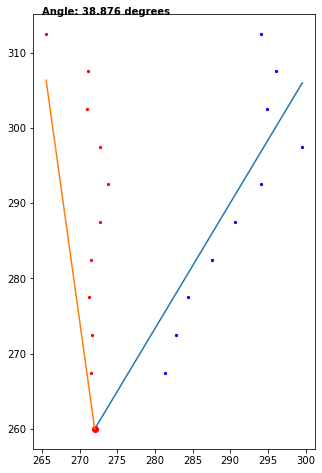

In [68]:
Gaussian_plot("VelocityMaps_co_225_274_SecondarySouth.txt",272,260,265,315,"VelocityMap_Co_225_274_SecRed.png","main",start_ind = 14, end_ind=24)

### Co_275_299

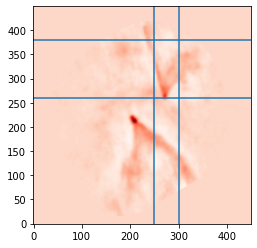

In [69]:
co_275_299_rot = ndimage.rotate(co_275_299, angle=-30,reshape=False)

plt.imshow(co_275_299_rot,cmap='Reds',origin='lower')
plt.axvline(250)
plt.axvline(300)
plt.axhline(380)
plt.axhline(260)

/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/RuheeJanmohamed/opt/anaconda3/lib/python3.8/site-

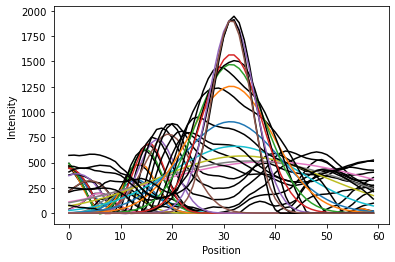

In [88]:
Gaussian_func('VelocityMaps_co_275_299_SecondarySouth.txt',240,300,co_275_299_rot,0,60,-70)

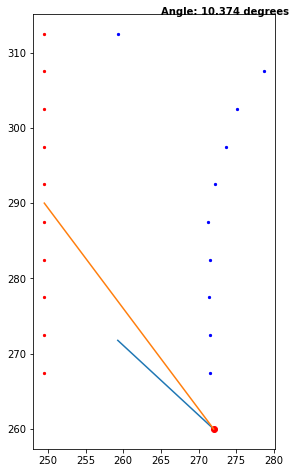

In [90]:
Gaussian_plot("VelocityMaps_co_275_299_SecondarySouth.txt",272,260,265,315,"VelocityMap_Co_275_299_SecRed.png","secondary",start_ind = 14, end_ind=24)

## Plotting Each Moment Map on Top of Each Other

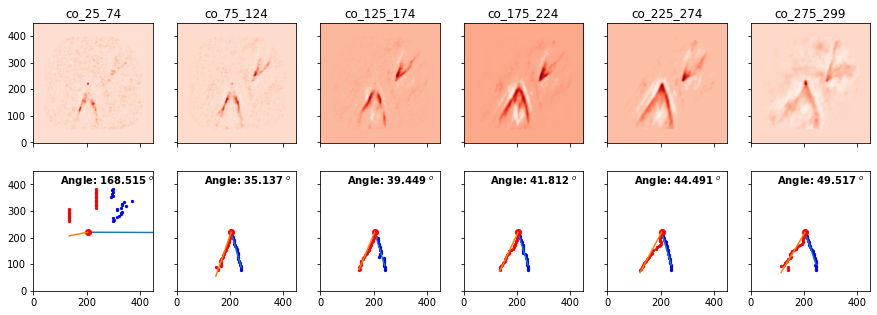

In [105]:
#Main Outflows

figure, ax = plt.subplots(2,6,figsize=[15,5],sharex=True,sharey=True)

Gauss_main = []

Gauss_main.append(Gaussian_subplot('VelocityMaps_co_25_74_South.txt',204,220,100,400,"VelocityMap_Co_25_74_Red.png","main",1,0))
Gauss_main.append(Gaussian_subplot('VelocityMaps_co_75_124_South.txt',204,220,100,400,"VelocityMap_Co_75_124_Red.png","main",1,1))
Gauss_main.append(Gaussian_subplot("VelocityMaps_co_125_174_South.txt",204,220,100,400,"VelocityMap_Co_125_174_Red.png","main",1,2))
Gauss_main.append(Gaussian_subplot("VelocityMaps_co_175_224_South.txt",204,220,100,400,"VelocityMap_Co_175_224_Red.png","main",1,3))
Gauss_main.append(Gaussian_subplot("VelocityMaps_co_225_274_South.txt",204,220,100,400,"VelocityMap_Co_225_274_Red.png","main",1,4))
Gauss_main.append(Gaussian_subplot("VelocityMaps_co_275_299_South.txt",204,220,100,400,"VelocityMap_Co_275_299_Red.png","main",1,5))


strings = ['co_25_74','co_75_124','co_125_174','co_175_224','co_225_274','co_275_299']

data_main = [co_25_74,co_75_124,co_125_174,co_175_224,co_225_274,co_275_299]


for j,data,string,plot_gauss in zip(range(0,6),data_main,strings,Gauss_main):
    ax[0,j].set_title(string)
    ax[0,j].imshow(data,cmap="Reds",origin='lower')
    plot_gauss
    

figure.savefig("Main_Red_Outflow.png")






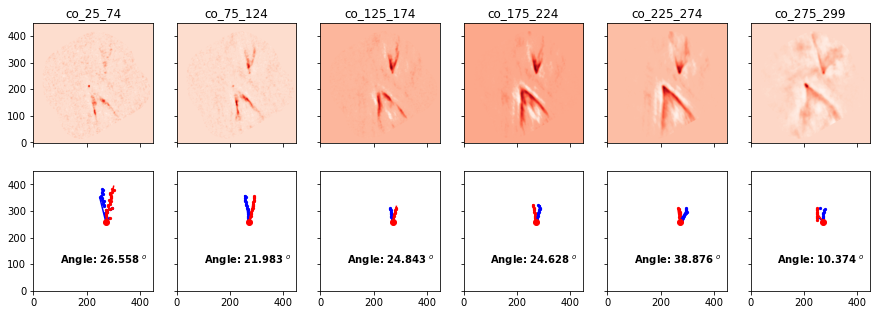

In [108]:
#Secondary Outflows

figure, ax = plt.subplots(2,6,figsize=[15,5],sharex=True,sharey=True)

Gauss_secondary = []

Gauss_secondary.append(Gaussian_subplot("VelocityMaps_co_25_74_SecondarySouth.txt",272,260,100,100,"VelocityMap_Co_25_74_SecRed.png","secondary",1,0))
Gauss_secondary.append(Gaussian_subplot("VelocityMaps_co_75_124_SecondarySouth.txt",272,260,100,100,"VelocityMap_Co_75_124_SecRed.png","secondary",1,1,start_ind = 5, end_ind=26))
Gauss_secondary.append(Gaussian_subplot("VelocityMaps_co_125_174_SecondarySouth.txt",272,260,100,100,"VelocityMap_Co_125_174_SecRed.png","secondary",1,2,start_ind = 14, end_ind=26))
Gauss_secondary.append(Gaussian_subplot("VelocityMaps_co_175_224_SecondarySouth.txt",272,260,100,100,"VelocityMap_Co_175_224_SecRed.png","main",1,3,start_ind = 12, end_ind=28))
Gauss_secondary.append(Gaussian_subplot("VelocityMaps_co_225_274_SecondarySouth.txt",272,260,100,100,"VelocityMap_Co_225_274_SecRed.png","main",1,4,start_ind = 14, end_ind=24))
Gauss_secondary.append(Gaussian_subplot("VelocityMaps_co_275_299_SecondarySouth.txt",272,260,100,100,"VelocityMap_Co_275_299_SecRed.png","secondary",1,5,start_ind = 14, end_ind=24))

strings = ['co_25_74','co_75_124','co_125_174','co_175_224','co_225_274','co_275_299']

data_main = [co_25_74_rot,co_75_124_rot,co_125_174_rot,co_175_224_rot,co_225_274_rot,co_275_299_rot]

for j,data,string,plot_gauss in zip(range(0,6),data_main,strings,Gauss_secondary):
    ax[0,j].set_title(string)
    ax[0,j].imshow(data,cmap="Reds",origin='lower')
    plot_gauss
    

figure.savefig("Secondary_Red_Outflow.png")

